<img src="img/keras.png" alt="drawing" width="250px"/>

# Keras Demo

## Regression
I.e. numerical output variable 

### Specify Architecture

In [142]:
import keras
from keras.layers import Dense #every node from input layer is connected to every node in next layer
from keras.models import Sequential #only nodes from two following layers are connected
from sklearn.datasets import load_boston

#data
boston = load_boston()
X = boston.data[:,0:13]
y = boston.target

# Save the number of columns in predictors
n_cols = X.shape[1]
# Set up the model
model = Sequential()
# Add the first layer
model.add(Dense(13, activation='relu', input_shape=(n_cols,)))
# Add the second layer
model.add(Dense(7, activation='relu'))
# Add the output layer
model.add(Dense(1))

### Compile and Fit
* Specify the optimizer
 * controls **the learning rate** - right choice can make a big difference how quickly we can find the right weight
 * can also make a big difference on how good a set of weights we can find
   * [Adam](https://keras.io/optimizers/#adam)
   * Other Keras optimizers 
* Second, specify **Loss function**

In [143]:
# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error')
# Verify that model contains information from compiling
print("Loss function: " + model.loss)

# Fit the model
model.fit(X,y)
#just as a simple demo, we didn't deploy any scaling,.. 

Loss function: mean_squared_error
Epoch 1/1
506/506 [==============================] - 0s 880us/step - loss: 13087.2959


## Classification 
I.e. categorical output variable

### Specify Architecture, Compile and Fit (few differences in comparison to regression)

- 1st difference in Loss function - categorical_crossentropy
- 2nd add metrics accuracy to compile step for easy to understand diagnostics
- 3rd modify the last layer - separate node for each possible outcome and use softmax

We will use one of the mnist datasets - [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). It has the same attributes as MNIST, image size (28x28), structure of training (60,000) and testing (10,000) splits, and 10 categories.

Label | Description | Label | Description 
--- | --- | --- | --- 
0 | T-shirt | 5 | Sandals
1 | Trousers | 6 | Shirt 
2 | Pullover | 7 | Sneakers
3 | Dress | 8 | Bag 
4 | Coat  | 9 | Ankle boots

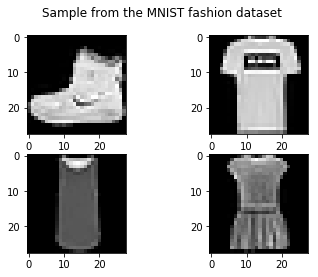

In [97]:
#Data
from keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline 

# Load the mnist
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Load the fashion-mnist #more fun
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_test_raw = X_test

# plot images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.suptitle('Sample from the MNIST fashion dataset', fontsize=12)
plt.show()


# The training dataset - 3-dimensional array:instance, image width, image height
# reduce the images down into a vector - 28×28 sized images converts into to 784 pixel input values
inputs = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], inputs).astype('float32')
X_test = X_test.reshape(X_test.shape[0], inputs).astype('float32')


# normalize
X_train = X_train / 255 #pixel values are gray scale between 0-255, i.e. transform to 0-1
X_test = X_test / 255

In [98]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

np.random.seed(42)
# Convert the target to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Save the number of columns in predictors and number of classes 
n_cols = X_train.shape[1]
n_class = y_train.shape[1]

# Set up the model
model = Sequential()
# Add the first layer
model.add(Dense(n_cols, activation='relu',input_shape=(n_cols,)))
# Add the output layer
model.add(Dense(n_class, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'] )
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
 - 4s - loss: 0.4944 - acc: 0.8269
Epoch 2/10
 - 4s - loss: 0.3617 - acc: 0.8705
Epoch 3/10
 - 4s - loss: 0.3247 - acc: 0.8819
Epoch 4/10
 - 4s - loss: 0.3009 - acc: 0.8886
Epoch 5/10
 - 4s - loss: 0.2804 - acc: 0.8962
Epoch 6/10
 - 4s - loss: 0.2679 - acc: 0.9013
Epoch 7/10
 - 4s - loss: 0.2547 - acc: 0.9050
Epoch 8/10
 - 4s - loss: 0.2400 - acc: 0.9108
Epoch 9/10
 - 4s - loss: 0.2288 - acc: 0.9139
Epoch 10/10
 - 4s - loss: 0.2216 - acc: 0.9164


### Predict

In [99]:
#if binary outcome
#predictions = model.predict(X_test)
# Calculate predicted probability of survival
#predicted_prob_true = predictions[:,1]
# print predicted_prob_true

# Evaluate the model on test set
model_eval = model.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print("Test accuracy is {}".format(model_eval[1]))

Test accuracy is 0.8849


### Improvements
#### Changing optimization parameters - Learning rate

In [100]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates
lr_to_test = [0.0001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = Sequential()
    model.add(Dense(n_cols, activation='relu',input_shape=(n_cols,)))
    model.add(Dense(n_class, activation='softmax'))
    
    # Create SGD optimizer with specified learning rate
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(X_train, y_train)
    
#'low value for the loss function is a good value for the loss function'
#for simplicity, 1 epoch



Testing model with learning rate: 0.000100

Epoch 1/1
60000/60000 [==============================] - 7s 110us/step - loss: 2.0537


Testing model with learning rate: 0.010000

Epoch 1/1
60000/60000 [==============================] - 7s 109us/step - loss: 0.6941


Testing model with learning rate: 1.000000

Epoch 1/1
60000/60000 [==============================] - 7s 112us/step - loss: 14.4937


### Validation

K-cross validation usually not used for deep learning, too computationally expensive. Rather we use **validation's step cca 0.3 with early stopping**

In [101]:
#the number of columns in predictors
n_cols = X_train.shape[1]
input_shape = (n_cols,)
# Specify the model
model = Sequential()
model.add(Dense(n_cols, activation='relu',input_shape=(n_cols,)))
model.add(Dense(n_class, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'] )
# Fit the model
model_fit = model.fit(X_train, y_train, validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/1
42000/42000 [==============================] - 8s 185us/step - loss: 0.5001 - acc: 0.8218 - val_loss: 0.4066 - val_acc: 0.8509


### Validation - Early stopping

In [102]:
from keras.callbacks import EarlyStopping

#the number of columns in predictors
n_cols = X_train.shape[1]
input_shape = (n_cols,)
# Specify the model
model = Sequential()
model.add(Dense(n_cols, activation='relu',input_shape=(n_cols,)))
model.add(Dense(n_class, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'] )

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2) #Stop optimization when the validation loss hasn't improved for 2 epochs

# Fit the model
model.fit(X_train, y_train, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 7s 176us/step - loss: 0.4995 - acc: 0.8224 - val_loss: 0.4534 - val_acc: 0.8305
Epoch 2/30
42000/42000 [==============================] - 7s 170us/step - loss: 0.3726 - acc: 0.8649 - val_loss: 0.3902 - val_acc: 0.8583
Epoch 3/30
42000/42000 [==============================] - 7s 166us/step - loss: 0.3358 - acc: 0.8764 - val_loss: 0.3595 - val_acc: 0.8674
Epoch 4/30
42000/42000 [==============================] - 8s 183us/step - loss: 0.3074 - acc: 0.8855 - val_loss: 0.3408 - val_acc: 0.8790
Epoch 5/30
42000/42000 [==============================] - 7s 163us/step - loss: 0.2875 - acc: 0.8927 - val_loss: 0.3165 - val_acc: 0.8853
Epoch 6/30
42000/42000 [==============================] - 8s 182us/step - loss: 0.2695 - acc: 0.8989 - val_loss: 0.3233 - val_acc: 0.8827
Epoch 7/30
42000/42000 [==============================] - 7s 171us/step - loss: 0.2553 - acc: 0.9042 - val_loss: 0.3587 - 

### Validation - Compare two models

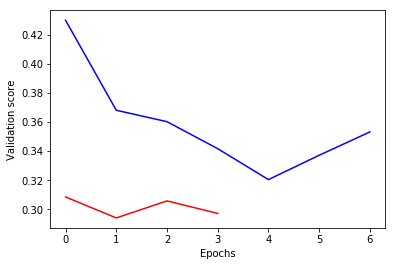

In [26]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Specify the new model for comparison
model_2 = Sequential()
model_2.add(Dense(n_cols, activation='relu',input_shape=(n_cols,)))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(n_class, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model
model_1_train = model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_train = model_2.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_train.history['val_loss'], 'r', model_2_train.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

Ok, overall on the testing set we classified correctly 8607 out of 10000. Let's now see some pictures that we missed actually.


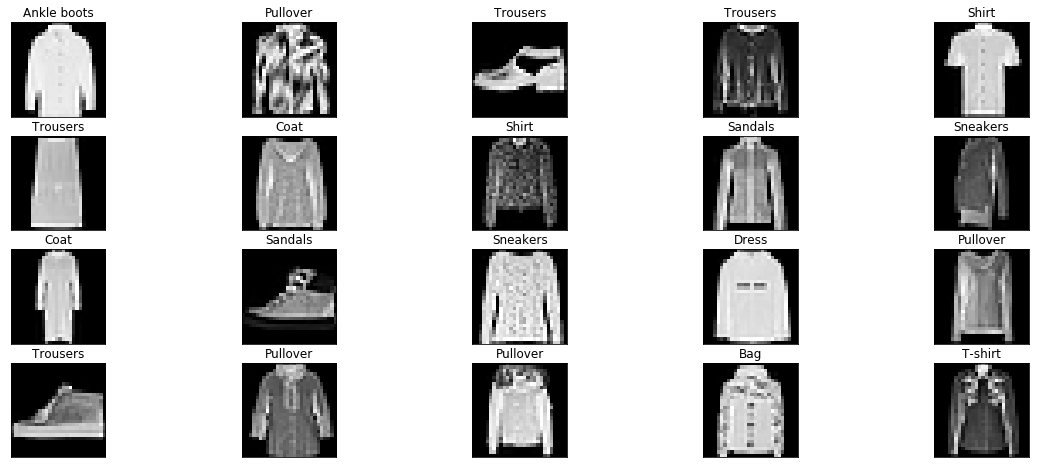

In [139]:
# get predictions
y_hat = model.predict(X_test)

# compare predictions with true labels
m =[]
for index in range(10000):
       m.append(np.argmax(y_hat[index]) == np.argmax(y_test[index]))


print("Ok, overall on the testing set we classified correctly {} out of {}. Let's now see some pictures that we missed actually.".format(np.sum(m), len(m)))


#choose 20 of the positions where we miss-classified
miss_class = [i for i,x in enumerate(m) if x==False][0:21]

# plot miss-classified objects
clothes_labels = {0:"T-shirt",
                        1:"Trousers",     
                        2:"Pullover", 
                        3:"Dress",       
                        4:"Coat",    
                        5:"Sandals", 
                        6:"Shirt", 
                        7:"Sneakers", 
                        8:"Bag", 
                        9:"Ankle boots"}

figure = plt.figure(figsize=(20, 8))
for i in range(20):
    ax = figure.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test_raw[miss_class][i], cmap=plt.get_cmap('gray'))
    prediction = np.argmax(y_hat[i])
    ax.set_title("{}".format(clothes_labels[prediction]))       